In [1]:
# found panadas_profiling in a Titanic machine learning article. Had to run in Python 3 environment.
import pandas as pd
# from pandas_profiling import ProfileReport

In [2]:
# Loading data. Used the Kaggle Titanic data for Segment 1 assignement - it is our sample set
from path import Path
file_path = Path('./Resources/train.csv')
df_titanic = pd.read_csv(file_path)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# describe the data set
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Learned and read from internet about Exploratory Data Analysis. This is using the panadas-profiling library.
# not able to get this to work. it means the panadas_profiling is not the latest version. I am not understanding
# how to update. It's nice to have and looks super neat.
# eda_report = ProfileReport(df_titanic)
# eda_report

In [4]:
# Initial imports. This code is directly from Module 17.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5]:
# Not sure what I was doing here. Trying to see if I understood linear regression. No, I don't. And the data didn't work.
# plt.scatter(df_titanic.Pclass, df_titanic.Sex)
# plt.xlabel('Pclass')
# plt.ylabel('Sex')
# plt.show()

Text(0, 0.5, '% Survived')

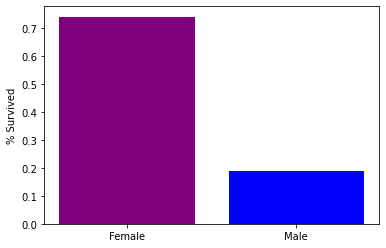

In [6]:
# trying plt.subplot found in Titanc literature and verified on matplotlib - the base structure that is
fig, ax = plt.subplots()
count = df_titanic['Sex'].value_counts(sort=False)
survive_count = df_titanic.loc[df_titanic['Survived'] == 1, ['Sex']].value_counts(sort=False)
ax.bar('Female', survive_count['female']/count['female'], color='purple')
ax.bar('Male', survive_count['male']/count['male'], color='blue')
ax.set_ylabel('% Survived')

In [7]:
# Encode the dataset - From Module 17
titanic_encoded = pd.get_dummies(df_titanic, columns=["Sex", "Embarked"])
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [8]:
# count the empty values
titanic_encoded.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [9]:
# Drop columns that missing rows or because it doesn't work 
titanic_encoded = titanic_encoded.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [10]:
# Remove rows missing values
titanic_encoded = titanic_encoded.dropna(subset = ['Age'])

In [11]:
titanic_encoded.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [12]:
# Define the features set. From Module 17.8
X = titanic_encoded.copy()
X = X.drop("Survived", axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
# Define the target set. From Module 17.8.
y = titanic_encoded["Survived"].ravel()
y[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [14]:
# Splitting into Train and Test sets. From Module 17.8.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Creating a StandardScaler instance. From Module 17.8.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create a random forest classifier. From Module 17.8.
rf_model = RandomForestClassifier(n_estimators=10, random_state=0) 

In [17]:
# Fitting the model. From Module 17.8.
rf_model = rf_model.fit(X_train_scaled, y_train)

In [18]:
# Making predictions using the testing data. From Module 17.8.
predictions = rf_model.predict(X_test_scaled)

In [19]:
# Calculating the confusion matrix. From Module 17.8.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,88,11
Actual 1,24,56


In [20]:
# Calculating the accuracy score. From Module 17.8.
acc_score = accuracy_score(y_test, predictions)

In [21]:
# Displaying results. From Module 17.8.
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,88,11
Actual 1,24,56


Accuracy Score : 0.8044692737430168
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.84      0.70      0.76        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



In [25]:
# Calculate feature importance in the Random Forest model. From Module 17.8.
importances = rf_model.feature_importances_
importances

array([0.15226009, 0.10960282, 0.18917857, 0.03315458, 0.02584372,
       0.18715329, 0.13523942, 0.13596665, 0.01639768, 0.00523522,
       0.00996795])

In [26]:
# We can sort the features by their importance. From Module 17.8.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1891785679172011, 'Age'),
 (0.18715329346641704, 'Fare'),
 (0.15226009190121673, 'PassengerId'),
 (0.13596664642679096, 'Sex_male'),
 (0.13523942233001415, 'Sex_female'),
 (0.10960282272336576, 'Pclass'),
 (0.033154584950383335, 'SibSp'),
 (0.0258437190865292, 'Parch'),
 (0.01639767831757796, 'Embarked_C'),
 (0.009967954927018937, 'Embarked_S'),
 (0.005235217953484719, 'Embarked_Q')]

In [24]:
importances.plot.bar()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'